# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 데이터 셋 읽어오기

In [3]:
df = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [4]:
df = df.drop(['product_subcategory', 'product_modelname', 'business_subarea',
                          'customer_country.1'], axis = 1)
df

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,entry level,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,trainee,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,entry level,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,...,others,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,134,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [6]:
"""
df = df.drop(['bant_submit', 'com_reg_ver_win_rate', 'historical_existing_cnt', 'id_strategic_ver',
                          'it_strategic_ver', 'ver_cus', 'ver_pro', 'ver_win_rate_x', 'ver_win_ratio_per_bu'], axis = 1)
"""
df.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,4,True


In [7]:
print(df['customer_country'].unique()[:10])
print(df['customer_country'].unique()[-10:])

['/Quezon City/Philippines' '/PH-00/Philippines' '/Kolkata /India'
 '/Bhubaneswar/India' '/Hyderabad/India' '/Abuja/Nigeria'
 '/Jeddah, KSA/Saudi Arabia' '/Guwahati/India' '/Cebu city/Philippines'
 '/hauz khas,delhi/India']
['/Itaú de Minas - Minas Gerais/Brazil' '/SP/ Jundiai/Brazil'
 '/Sergipe/Aracaju/Brazil' '/Estado de Mexico /Mexico'
 '/Baturaja/Indonesia' '/Sląskie/Poland' '/Bogotá DC /Colombia'
 '/Pisco/Peru' '/santa cruz bolivia/Peru' '/paris/France']


# customer_country

In [8]:
df['customer_country'] = df['customer_country'].str.split('/').str[-1]

import pycountry

def validate_country(data):
    try:
        return pycountry.countries.lookup(data).name
    except LookupError:
        return pd.NA   # 국가이름 아닐시 nan으로 반환
df['customer_country'] = df['customer_country'].apply(validate_country)
df.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
0,1.0,Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,0,True
1,1.0,Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,1,True
2,1.0,India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,2,True
3,1.0,India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,3,True
4,1.0,India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,4,True


In [9]:
print(df['customer_country'].count())
print(df['customer_country'].nunique())
print(df['customer_country'].unique())

53282
156
['Philippines' 'India' 'Nigeria' 'Saudi Arabia' 'Singapore' 'Brazil' <NA>
 'South Africa' 'United States' 'Colombia' 'Mexico' 'Ghana' 'Egypt'
 'Ethiopia' 'Australia' 'Kenya' 'Indonesia' 'Oman' 'Pakistan'
 'United Kingdom' 'Guatemala' 'Panama' 'Canada' 'Bangladesh'
 'Papua New Guinea' 'Tanzania, United Republic of' 'Qatar' 'Afghanistan'
 'Chile' 'Mozambique' 'Türkiye' 'El Salvador' 'Togo' 'Jordan' 'Iraq'
 'Israel' 'Sri Lanka' 'Korea, Republic of' 'Portugal' 'Mauritania'
 'Uruguay' 'Peru' 'Germany' 'Romania' 'Norway' 'Jamaica' 'Hungary'
 'Poland' 'Spain' 'Argentina' 'Ecuador' 'Senegal' 'Hong Kong' 'Malaysia'
 'Japan' 'Kuwait' 'Ireland' 'Albania' 'Greece' 'Algeria' 'Nicaragua'
 'Slovenia' 'Italy' 'Netherlands' 'Dominican Republic' 'France' 'Uganda'
 'Iran, Islamic Republic of' 'Paraguay' 'Bolivia, Plurinational State of'
 'Namibia' 'Tunisia' 'Puerto Rico' 'Anguilla' 'Croatia' 'Fiji' 'Denmark'
 'Sweden' 'Cyprus' 'Belgium' 'Venezuela, Bolivarian Republic of'
 'Maldives' 'Morocco' 

In [10]:
grouped_df = df.groupby('customer_country')['is_converted'].count().reset_index()
grouped_df = grouped_df.sort_values(by='is_converted', ascending=False)
# 수가 적은 나라 수 데이터 합 578개 (약 1.1%)
print(grouped_df[grouped_df['is_converted'] <= 100].sum())
grouped_df[grouped_df['is_converted'] <= 100]

customer_country    Costa RicaDominican RepublicIsraelOmanPakistan...
is_converted                                                     2500
dtype: object


,customer_country,is_converted
36,Costa Rica,99
43,Dominican Republic,92
72,Israel,91
106,Oman,91
107,Pakistan,87
...,...,...
16,Belarus,1
91,Mauritania,1
65,Iceland,1
61,Haiti,1


In [11]:
# null값 n으로 치환. null값 6017개
print(df[df['customer_country'] =='none']['customer_country'].count())
df.loc[df['customer_country'].isnull() == True, 'customer_country'] = 'none'
print(df[df['customer_country'] =='none']['customer_country'].count())

# 데이터가 100개 이하인 나라 카테고리
low_num_country = grouped_df[grouped_df['is_converted'] <= 100]['customer_country']

# low_num_에 있는 단어를 'none'으로 치환하는 함수
def replace_words_with_n(text, word_list):
    if text in word_list.values:
        return 'none'
    else:
        return text

# 데이터프레임의 'customer_country' 열에 함수를 적용하여 치환
df['customer_country'] = df['customer_country'].apply(lambda x: replace_words_with_n(x, low_num_country))

print(df['customer_country'].count())
print(df['customer_country'].nunique())
print(df['customer_country'].unique())

0
6017
59299
36
['Philippines' 'India' 'Nigeria' 'Saudi Arabia' 'Singapore' 'Brazil'
 'none' 'South Africa' 'United States' 'Colombia' 'Mexico' 'Egypt'
 'Australia' 'Kenya' 'Indonesia' 'United Kingdom' 'Panama' 'Canada'
 'Chile' 'Türkiye' 'Iraq' 'Portugal' 'Peru' 'Germany' 'Hungary' 'Poland'
 'Spain' 'Argentina' 'Ecuador' 'Hong Kong' 'Malaysia' 'Italy' 'France'
 'Thailand' 'Viet Nam' 'Bulgaria']


In [12]:
############## cusomer_country 전처리_test_ver #############

df_test['customer_country'] = df_test['customer_country'].str.split('/').str[-1]
df_test['customer_country'] = df_test['customer_country'].apply(validate_country)

grouped_df_test = df_test.groupby('customer_country')['is_converted'].count().reset_index()
grouped_df_test = grouped_df_test.sort_values(by='is_converted', ascending=False)
df_test.loc[df_test['customer_country'].isnull() == True, 'customer_country'] = 'none'
low_num_country_test = grouped_df_test[grouped_df_test['is_converted'] <= 20]['customer_country']
df_test['customer_country'] = df_test['customer_country'].apply(lambda x: replace_words_with_n(x, low_num_country_test))


# business unit

In [13]:
print(df['business_unit'].nunique())
print(df['business_unit'].unique())

5
['AS' 'ID' 'IT' 'Solution' 'CM']


# customer_type

In [14]:
# 소문자 치환
df['customer_type'] = df['customer_type'].str.lower()
# other, others, etc를 other로 통합
df.loc[df['customer_type'].str.contains('other') == True,'customer_type'] = 'other'
df.loc[df['customer_type'].str.contains('etc') == True,'customer_type'] = 'other'
# end-customer, end-usr, end customer, commercial end-user을 end-customer로 치환
df.loc[df['customer_type'].str.contains('end') == True,'customer_type'] = 'end-customer'
print(df['customer_type'].nunique())
print(df['customer_type'].unique())

28
['end-customer' 'specifier/ influencer' 'service partner'
 'channel partner' nan 'corporate' 'specifier / influencer'
 'solution eco-partner' 'distributor' 'other' 'system integrator'
 'consultant' 'installer' 'homeowner' 'technician' 'installer/contractor'
 'engineer' 'manager / director' 'developer' 'architect/consultant'
 'hvac engineer' 'reseller' 'software/solution provider'
 'software / solution provider' 'dealer/distributor' 'technical assistant'
 'interior designer' 'home owner' 'administrator']


In [15]:
############## cusomer_type 전처리_test_ver #############

df_test['customer_type'] = df_test['customer_type'].str.lower()
df_test.loc[df_test['customer_type'].str.contains('other') == True,'customer_type'] = 'other'
df_test.loc[df_test['customer_type'].str.contains('etc') == True,'customer_type'] = 'other'
df_test.loc[df_test['customer_type'].str.contains('end') == True,'customer_type'] = 'end-customer'


# product_category

In [16]:
print(df['product_category'].count())
print(df['product_category'].nunique())
grouped_df = df.groupby('product_category')['is_converted'].count().reset_index()
grouped_df = grouped_df.sort_values(by='is_converted', ascending=False)
print(grouped_df[-30:])

39925
357
                                      product_category  is_converted
187                                    one quick works             1
182                                      not specified             1
181                           multi-split,single-split             1
172                              monitorindustrial_rmk             1
133                      monior/monitor tv,audio/video             1
134                          monior/monitor tv,chiller             1
136            monior/monitor tv,projector,audio/video             1
137                     monior/monitor tv,refrigerator             1
138         monior/monitor tv,refrigerator,audio/video             1
139  monior/monitor tv,system ac,tv,pc,refrigerator...             1
140  monior/monitor tv,system ac,tv,refrigerator,wa...             1
142  monior/monitor tv,tv,commercial tv,pc,refriger...             1
147          monitor signage,commercial tv,audio/video             1
149  monitor signage,com

In [17]:
# 소문자로 치환
df['product_category'] = df['product_category'].str.lower()

# null값 n으로 치환
df.loc[df['product_category'].isnull() == True, 'product_category'] = 'none'

# 기호들을 공백으로 치환
def replace_symbols(text):
    # 만약 문자열이 아니면 그대로 반환
    if not isinstance(text, str):
        return text
    return text.replace(',', ' ').replace('-', ' ').replace('/', ' ')

replaced_df = df['product_category'].apply(replace_symbols)
df['product_category'] = replaced_df
print(df['product_category'].count())
print(df['product_category'].nunique())
print(df['product_category'].unique())

59299
356
['multi split' 'single split' 'vrf' 'chiller' 'etc.' 'rac'
 'teto ou cassete inverter' 'none' 'software solution'
 'all lg vrf systems' 'ventilation' 'a thermodynamic water heater'
 'residential air conditioner' 'outros' 'heating' 'multi v5 vrf'
 'split tunggal' 'multi inverter' 'חימום' 'standard signage'
 'high brightness signage' 'interactive signage' 'video wall signage'
 'led signage' 'hotel tv' 'signage care solution' 'oled signage' 'idb'
 'video wall' 'one:quick series' 'commercial tv' 'lg one:quick'
 'special signage' 'other' 'accessories' 'commercial display'
 'interactive digital board' 'standard' 'uhd signage' 'smart tv signage'
 'lg one:quick series' 'pro:centric' 'ur640' 'ur640s' 'webos'
 'signage care solutions' 'aio | one quick' 'high brightness'
 'hospital tv' 'digital signage' 'monitor' 'pc' 'laptop' 'projector'
 'cloud device' 'medical display' 'washing machine dryer' 'solar chiller'
 'system ac rac' 'monitor signage commercial tv monior monitor tv'
 'monitor

In [18]:
# import re

# # 알파벳을 포함하고, 한글, 중국어 등의 다른 문자를 포함하지 않은 데이터만 남기기
# # False가 반환되는 값은 'etc'로 치환
# def contains_valid_chars(text):
#     if bool(re.match(r'^[a-zA-Z\s]+$', str(text))):
#         return text
#     else:
#         return 'etc'

# # product_category 열에 함수 적용
# df['product_category'] = df['product_category'].apply(contains_valid_chars)

# # 출력
# # etc에 포함되는 데이터 4079개 (전체 데이터의 11%)
# print(df[df['product_category'] == 'etc']['product_category'].count())
# print(df['product_category'].count())
# print(df['product_category'])

In [19]:
# other, others, etc.를 other로 통합
df.loc[df['product_category'].str.contains('other') == True,'customer_type'] = 'other'
df.loc[df['product_category'].str.contains('etc') == True,'customer_type'] = 'other'

print(df['product_category'].count())
print(df['product_category'].nunique())
print(df['product_category'].unique())

59299
356
['multi split' 'single split' 'vrf' 'chiller' 'etc.' 'rac'
 'teto ou cassete inverter' 'none' 'software solution'
 'all lg vrf systems' 'ventilation' 'a thermodynamic water heater'
 'residential air conditioner' 'outros' 'heating' 'multi v5 vrf'
 'split tunggal' 'multi inverter' 'חימום' 'standard signage'
 'high brightness signage' 'interactive signage' 'video wall signage'
 'led signage' 'hotel tv' 'signage care solution' 'oled signage' 'idb'
 'video wall' 'one:quick series' 'commercial tv' 'lg one:quick'
 'special signage' 'other' 'accessories' 'commercial display'
 'interactive digital board' 'standard' 'uhd signage' 'smart tv signage'
 'lg one:quick series' 'pro:centric' 'ur640' 'ur640s' 'webos'
 'signage care solutions' 'aio | one quick' 'high brightness'
 'hospital tv' 'digital signage' 'monitor' 'pc' 'laptop' 'projector'
 'cloud device' 'medical display' 'washing machine dryer' 'solar chiller'
 'system ac rac' 'monitor signage commercial tv monior monitor tv'
 'monitor

In [20]:
# 그룹으로 묶어 카테고리별 데이터 수 확인
grouped_df = df.groupby('product_category')['is_converted'].count().reset_index()
grouped_df = grouped_df.sort_values(by='is_converted', ascending=False)
grouped_df[:30]

,product_category,is_converted
181,none,19374
98,interactive digital board,6154
314,vrf,5640
174,multi split,3676
309,video wall signage,2029
80,etc.,2018
114,led signage,1895
99,interactive signage,1862
234,single split,1574
212,rac,1447


In [21]:
grouped_df[-10:]

,product_category,is_converted
159,monitor signage mobile,1
161,monitor signage monior monitor tv commercial tv,1
162,monitor signage monior monitor tv pc tv,1
163,monitor signage monior monitor tv system ac va...,1
164,monitor signage monior monitor tv tv audio video,1
165,monitor signage monior monitor tv vacuum clean...,1
167,monitor signage solar,1
168,monitor signage solar monior monitor tv pc pro...,1
169,monitor signage solar robot water care,1
355,高亮度顯示屏,1


In [22]:
# # monitor signage를 포함하는 데이터 통합 -> monitor signage가 제일 앞에 있는 경향
# # monior monitor tv를 포함하는 데이터 통합 -> 그 다음으로 많이 보임
# # commercial tv, vrf multi split -> 마찬가지
# df.loc[df['product_category'].str.contains('monitor signage') == True,'product_category'] = 'monitor signage'
# df.loc[df['product_category'].str.contains('monior monitor tv') == True,'product_category'] = 'monior monitor tv'
# df.loc[df['product_category'].str.contains('commercial tv') == True,'product_category'] = 'commercial tv'
# df.loc[df['product_category'].str.contains('vrf multi split') == True,'product_category'] = 'vrf multi split'
# print(df['product_category'].count())
# print(df['product_category'].nunique())
# print(df['product_category'].unique())

In [23]:
# 카테고리가 20개 이하인 카테고리 none으로 치환
# 모두 합하면 854개(약 2.1%)
grouped_df = df.groupby('product_category')['is_converted'].count().reset_index()
grouped_df = grouped_df.sort_values(by='is_converted', ascending=False)
print(grouped_df[grouped_df['is_converted'] <= 20].sum())
grouped_df[grouped_df['is_converted'] <= 20]

product_category    servicesmonitor & pccommercial tv tvaire acond...
is_converted                                                      854
dtype: object


,product_category,is_converted
228,services,20
144,monitor & pc,19
64,commercial tv tv,19
35,aire acondicionado residencial,18
192,onequick series,16
...,...,...
165,monitor signage monior monitor tv vacuum clean...,1
167,monitor signage solar,1
168,monitor signage solar monior monitor tv pc pro...,1
169,monitor signage solar robot water care,1


In [24]:
low_num_category = grouped_df[grouped_df['is_converted'] <= 20]['product_category']

# low_num_에 있는 단어를 'none'으로 치환하는 함수
# 데이터프레임의 'product_category' 열에 함수를 적용하여 치환
df['product_category'] = df['product_category'].apply(lambda x: replace_words_with_n(x, low_num_category))

print(df['product_category'].count())
print(df['product_category'].nunique())
print(df['product_category'].unique())

59299
60
['multi split' 'single split' 'vrf' 'chiller' 'etc.' 'rac'
 'teto ou cassete inverter' 'none' 'software solution'
 'all lg vrf systems' 'ventilation' 'a thermodynamic water heater'
 'residential air conditioner' 'outros' 'heating' 'multi inverter'
 'standard signage' 'high brightness signage' 'interactive signage'
 'video wall signage' 'led signage' 'hotel tv' 'signage care solution'
 'oled signage' 'idb' 'video wall' 'one:quick series' 'commercial tv'
 'special signage' 'accessories' 'commercial display'
 'interactive digital board' 'uhd signage' 'smart tv signage'
 'lg one:quick series' 'pro:centric' 'ur640' 'ur640s' 'webos'
 'high brightness' 'hospital tv' 'digital signage' 'monitor' 'pc' 'laptop'
 'projector' 'cloud device' 'medical display'
 'monitor signage monior monitor tv' 'solar ess' '43us660h0sd.awz'
 'control' 'multi v 5 air' 'ar condicionado residencial'
 'technical support' 'medical displays' 'virtual production'
 'ogrzewanie (pompy ciepła)' 'ledallinone' 'videow

In [25]:
############## product_category 전처리_test_ver #############

df_test['product_category'] = df_test['product_category'].str.lower()
df_test.loc[df_test['product_category'].isnull() == True, 'product_category'] = 'none'
df_test['product_category'] = df_test['product_category'].apply(replace_symbols)

df_test.loc[df['product_category'].str.contains('other') == True,'customer_type'] = 'other'
df_test.loc[df['product_category'].str.contains('etc') == True,'customer_type'] = 'other'

grouped_df_test = df_test.groupby('product_category')['is_converted'].count().reset_index()
grouped_df_test = grouped_df_test.sort_values(by='is_converted', ascending=False)
low_num_category_test = grouped_df_test[grouped_df_test['is_converted'] <= 20]['product_category']
df_test['product_category'] = df_test['product_category'].apply(lambda x: replace_words_with_n(x, low_num_category_test))


# customer_position

In [26]:
import re
print(df['customer_position'].count())
# 소문자로 치환
df['customer_position'] = df['customer_position'].str.lower()
# other, others, etc.를 other로 통합
df.loc[df['customer_position'].str.contains('other') == True,'customer_position'] = 'other'
df.loc[df['customer_position'].str.contains('etc') == True,'customer_position'] = 'other'

# null값 n으로 치환. none과 null값은 다른것으로 판단
# null값 없음
df.loc[df['customer_position'].isnull() == True, 'customer_position'] = 'n'
print(df[df['customer_position'] =='none']['customer_position'].count())
print(df[df['customer_position'] =='n']['customer_position'].count())
# none이 아닌 데이터 약 4만개

# 기호들을 공백으로 치환
def replace_symbols(text):
    # 만약 문자열이 아니면 그대로 반환
    if not isinstance(text, str):
        return text
    text = text.replace(',', ' ').replace('-', ' ').replace('/', ' ')
    # 단어 사이의 공백이 두 칸 이상인 부분을 공백 한 칸으로 바꿈
    text = re.sub(r'\s{2,}', ' ', text)
    return text

replaced_df = df['customer_position'].apply(replace_symbols)
df['customer_position'] = replaced_df

print(df['customer_position'].nunique())
print(df['customer_position'].unique())

59299
19680
0
113
['entry level' 'ceo founder' 'partner' 'manager' 'vice president'
 'associate analyst' 'c level executive' 'none' 'director' 'other'
 'intern' 'trainee'
 'this is a consume display requirement for home purpose.' 'vicepresident'
 'consulting' 'entrylevel' 'c levelexecutive' 'unpaid' 'physics teacher'
 'assistant professor' 'av management' 'maths lecturer' 'founder'
 'engineering' 'installer' 'homeowner' 'consultant' 'commercial end user'
 'employee' 'bulgaria' 'lider de desarrollo' 'administrative'
 'entrepreneurship' 'decision influencer' 'decision maker' 'customer'
 'not applicable' 'no influence' 'commercial consultant' 'science teacher'
 'technical' 'architecture consult' 'architect consultant' 'exhibition'
 'hospital' 'end user' 'government' 'manufacturer'
 'software solution provider' 'system integrator'
 'medical device manufacturer' 'distributor' 'business unit director'
 'business development' 'operations' 'vp' 'cargo' 'guest faculty'
 'physics faculty' 'caree

In [27]:
# # 특정 단어 수 이상인 문장 제거
# def replace_long_sentences(sentences, threshold):
#     updated_sentences = []
#     for sentence in sentences:
#         # 문장을 단어로 분할하여 단어의 개수를 세기
#         words = sentence.split()
#         if len(words) >= threshold:
#             # 'n'으로 치환
#             updated_sentences.append('none')
#         else:
#             updated_sentences.append(sentence)
#     return updated_sentences

# filtered_sentences = replace_long_sentences(df['customer_position'], 5)
# df['customer_position'] = filtered_sentences
# print(df['customer_position'].count())
# print(df['customer_position'].nunique())
# print(df['customer_position'].unique())

In [28]:
# 카테고리가 20개 이하인 카테고리 n으로 치환
# 10개 이하인 카테고리 252개 (약 0.6%)
grouped_df = df.groupby('customer_position')['is_converted'].count().reset_index()
grouped_df = grouped_df.sort_values(by='is_converted', ascending=False)
print(grouped_df[grouped_df['is_converted'] <= 20].sum())
grouped_df[grouped_df['is_converted'] <= 20]

customer_position    unpaiddecision influenceremployeedecision make...
is_converted                                                       252
dtype: object


,customer_position,is_converted
109,unpaid,17
32,decision influencer,16
40,employee,14
33,decision maker,12
111,vicepresident,11
...,...,...
66,maths lecturer,1
69,mindenes,1
70,neet olympiad expert faculty,1
77,pathologist,1


In [29]:
low_num_position = grouped_df[grouped_df['is_converted'] <= 20]['customer_position']

# low_num_position에 있는 단어를 'n'으로 치환하는 함수
# 데이터프레임의 'customer_position' 열에 함수를 적용하여 치환
df['customer_position'] = df['customer_position'].apply(lambda x: replace_words_with_n(x, low_num_position))

print(df['customer_position'].count())
print(df['customer_position'].nunique())
print(df['customer_position'].unique())

59299
22
['entry level' 'ceo founder' 'partner' 'manager' 'vice president'
 'associate analyst' 'c level executive' 'none' 'director' 'other'
 'intern' 'trainee' 'installer' 'homeowner' 'consultant' 'hospital'
 'end user' 'government' 'manufacturer' 'software solution provider'
 'system integrator' 'cargo']


In [30]:
############## customer_position 전처리_test_ver #############

df_test['customer_position'] = df_test['customer_position'].str.lower()
df_test.loc[df_test['customer_position'].str.contains('other') == True,'customer_position'] = 'other'
df_test.loc[df_test['customer_position'].str.contains('etc') == True,'customer_position'] = 'other'
df_test.loc[df['customer_position'].isnull() == True, 'customer_position'] = 'n'
df_test['customer_position'] = df_test['customer_position'].apply(replace_symbols)

grouped_df_test = df_test.groupby('customer_position')['is_converted'].count().reset_index()
grouped_df_test = grouped_df_test.sort_values(by='is_converted', ascending=False)
low_num_position_test = grouped_df_test[grouped_df_test['is_converted'] <= 20]['customer_position']
df_test['customer_position'] = df_test['customer_position'].apply(lambda x: replace_words_with_n(x, low_num_position_test))


# response_corporate

In [31]:
print(df['response_corporate'].nunique())
print(df['response_corporate'].unique())
grouped_df = df.groupby('response_corporate')['is_converted'].count().reset_index()
grouped_df = grouped_df.sort_values(by='is_converted', ascending=False)
grouped_df

53
['LGEPH' 'LGEIL' 'LGEAF' 'LGESJ' 'LGESL' 'LGESP' 'LGEGF' 'LGESA' 'LGEUS'
 'LGECB' 'LGEMS' 'LGEEG' 'LGEEF' 'LGEAP' 'LGEIN' 'LGEUK' 'LGEKR' 'LGEPS'
 'LGECI' 'LGECL' 'LGETK' 'LGELF' 'LGEPT' 'LGEPR' 'LGEDG' 'LGERO' 'LGEMK'
 'LGEPL' 'LGECZ' 'LGEES' 'LGEAR' 'LGEHK' 'LGEML' 'LGEJP' 'LGEHS' 'LGEAS'
 'LGEYK' 'LGEIS' 'LGEBN' 'LGEFS' 'LGESW' 'LGEMC' 'LGEAG' 'LGEEB' 'LGETH'
 'LGEVH' 'LGECH' 'LGELA' 'LGETT' 'LGERA' 'LGEUR' 'LGEIR' 'LGEBT']


,response_corporate,is_converted
21,LGEIL,16908
43,LGESP,9311
50,LGEUS,5955
32,LGEMS,2768
33,LGEPH,2651
18,LGEGF,2149
7,LGECB,2079
48,LGEUK,1651
41,LGESJ,1469
10,LGECL,1339


# expected_timeline

In [32]:
print(df['expected_timeline'].nunique())
print(df['expected_timeline'].unique()[:10])

449
['less than 3 months' nan '3 months ~ 6 months' '9 months ~ 1 year'
 'more than a year' '6 months ~ 9 months'
 'quote has been sent to customer.'
 'partner was exploring on eol model for some requiremeent. no designated sales or closure expected hence closing in the system.'
 'already close in july purchse with rd'
 'client not interested in product.. receing call and not answering properly']


In [33]:
# # 특수문자를 단순 제거하면 안된다
# df['expected_timeline'] = df['expected_timeline'].str.lower()
# # 알파벳, 숫자, 공백을 제외한 모든 문자 제거하는 함수
# def remove_special_characters(text):
#     pattern = r'[^a-zA-Z0-9\s]'  # 알파벳과 숫자, 공백을 제외한 모든 문자
#     text = re.sub(pattern, '', text)
#     text = re.sub(r'\s{2,}', ' ', text)  # 단어 사이의 공백이 두 칸 이상인 부분을 공백 한 칸으로 바꿈
#     return text

# # 'expected_timeline' 열의 모든 값을 문자열로 변환하여 리스트로 가져옴
# expected_timeline = df['expected_timeline'].astype(str).tolist()

# # 각 문자열에 대해 특수 문자 제거 함수를 적용하여 변환된 값들을 리스트로 저장
# cleaned_expected_timeline = [remove_special_characters(text) for text in expected_timeline]

# # 변환된 값들을 다시 DataFrame의 'expected_timeline' 열에 할당
# df['expected_timeline'] = cleaned_expected_timeline

In [34]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/elicer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/elicer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/elicer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# 토큰화 & 불용어 제거
from nltk.corpus import stopwords
from konlpy.tag import Okt
from nltk.stem import PorterStemmer

# 불용어 제거를 위한 영어 불용어 리스트
stop_words = set(stopwords.words('english'))

# 어간 추출
stemmer = PorterStemmer()

# 텍스트 데이터
text = df['expected_timeline'].astype(str)

# 각 문장을 단어로 토큰화한 후 불용어를 제거하는 과정
tokenized_sentences = []
for sentence in text:
    # 문장을 단어로 토큰화
    tokens = word_tokenize(sentence)
    # 불용어 제거 & 어간 추출
    filtered_sentence = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words]
    tokenized_sentences.append(filtered_sentence)

tokenized_sentences = pd.Series(tokenized_sentences)
df['expected_timeline'] = tokenized_sentences

In [36]:

# 정수 인코딩
from sklearn.preprocessing import LabelEncoder

# 모든 리스트의 요소를 하나의 리스트로 펼치기
all_values = [val for sublist in tokenized_sentences for val in sublist]

# 정수 인코딩을 위해 LabelEncoder 사용
label_encoder = LabelEncoder()
label_encoder.fit(all_values)

# 각 리스트의 요소를 정수로 변환하여 저장
df['expected_timeline'] = tokenized_sentences.apply(lambda x: [label_encoder.transform([item])[0] for item in x])

df['expected_timeline']


0                 [356, 50, 392]
1                 [356, 50, 392]
2                 [356, 50, 392]
3                 [356, 50, 392]
4                 [356, 50, 392]
                  ...           
59294    [50, 392, 658, 72, 392]
59295    [91, 392, 658, 18, 654]
59296             [356, 50, 392]
59297                      [654]
59298             [356, 50, 392]
Name: expected_timeline, Length: 59299, dtype: object

In [37]:
############## expected_timeline 전처리_test_ver #############

text_test = df['expected_timeline'].astype(str)
tokenized_sentences_test = []
for sentence in text_test:
    # 문장을 단어로 토큰화
    tokens_test = word_tokenize(sentence)
    # 불용어 제거 & 어간 추출
    filtered_sentence_test = [stemmer.stem(word.lower()) for word in tokens_test if word.lower() not in stop_words]
    tokenized_sentences_test.append(filtered_sentence_test)

tokenized_sentences_test = pd.Series(tokenized_sentences_test)
df_test['expected_timeline'] = tokenized_sentences_test

all_values_test = [val for sublist in tokenized_sentences_test for val in sublist]
label_encoder.fit(all_values_test)
df_test['expected_timeline'] = tokenized_sentences_test.apply(lambda x: [label_encoder.transform([item])[0] for item in x])


## 2. 데이터 전처리

In [38]:
df_n = df.select_dtypes(include=["number"])

df_n_information = []

for name in df_n:
    dt = df[name].describe()
    IQR = dt['75%'] - dt['25%']
    lower_bound = dt['25%'] - 1.5 * IQR
    upper_bound = dt['75%'] + 1.5 * IQR
    outliers = df[(df[name] < lower_bound) | (df[name] > upper_bound)][name]
    
    df_n_information.append({
        'Variable': name,
        'Median': dt['50%'],
        'Mean' : dt['mean'],
        'Q1': dt['25%'],
        'Q2': dt['50%'],
        'Q3': dt['75%'],
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers.count()
    })

stats = pd.DataFrame(df_n_information)
stats

,Variable,Median,Mean,Q1,Q2,Q3,IQR,Lower Bound,Upper Bound,Outliers Count
0,bant_submit,0.500000,0.634593,0.500000,0.500000,1.000000,0.500000,-0.250000,1.750000,0
1,com_reg_ver_win_rate,0.049180,0.091685,0.019900,0.049180,0.074949,0.055048,-0.062672,0.157521,1340
2,customer_idx,26774.000000,27114.556333,14913.000000,26774.000000,40368.500000,25455.500000,-23270.250000,78551.750000,0
3,historical_existing_cnt,4.000000,19.912184,1.000000,4.000000,19.000000,18.000000,-26.000000,46.000000,1676
4,id_strategic_ver,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0
5,it_strategic_ver,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0
6,idit_strategic_ver,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0
7,lead_desc_length,29.000000,79.271590,7.000000,29.000000,92.000000,85.000000,-120.500000,219.500000,5558
8,ver_cus,0.000000,0.041603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2467
9,ver_pro,0.000000,0.050810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3013


## customer_country

In [39]:
df['customer_country'] = df['customer_country'].astype('category')
df['customer_country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: customer_country
Non-Null Count  Dtype   
--------------  -----   
59299 non-null  category
dtypes: category(1)
memory usage: 59.4 KB


In [40]:
# df_test['customer_country'] = df_test['customer_country'].astype('category')

## business_unit

In [41]:
df['business_unit'] = df['business_unit'].astype('category')

In [42]:
# df_test['business_unit'] = df_test['business_unit'].astype('category')

## customer_idx

In [43]:
df['customer_idx'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: customer_idx
Non-Null Count  Dtype
--------------  -----
59299 non-null  int64
dtypes: int64(1)
memory usage: 463.4 KB


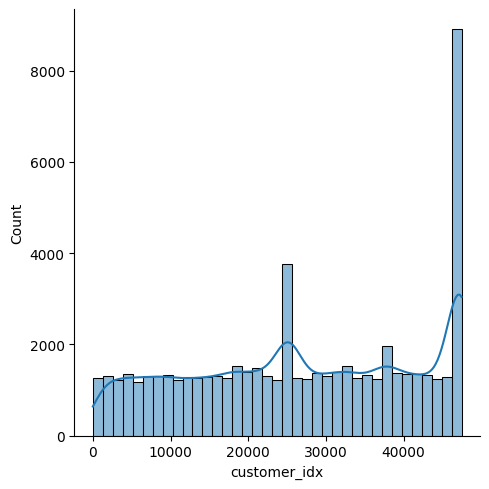

In [44]:
sns.displot(df['customer_idx'], kde=True)

In [45]:
unique_customer_idx = df['customer_idx'].nunique()
unique_customer_idx

35112

In [46]:
df['customer_idx'] = df['customer_idx'].astype('category')
df['customer_idx'].dtype

CategoricalDtype(categories=[    2,     3,     5,     7,     8,    10,    12,    13,
                     14,    15,
                  ...
                  47454, 47455, 47456, 47457, 47458, 47459, 47460, 47464,
                  47465, 47466],
, ordered=False, categories_dtype=int64)

In [47]:
# df_test['customer_idx'] = df_test['customer_idx'].astype('category')
# df_test['customer_idx'].dtype

## customer_type

In [48]:
df['customer_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: customer_type
Non-Null Count  Dtype 
--------------  ----- 
16448 non-null  object
dtypes: object(1)
memory usage: 463.4+ KB


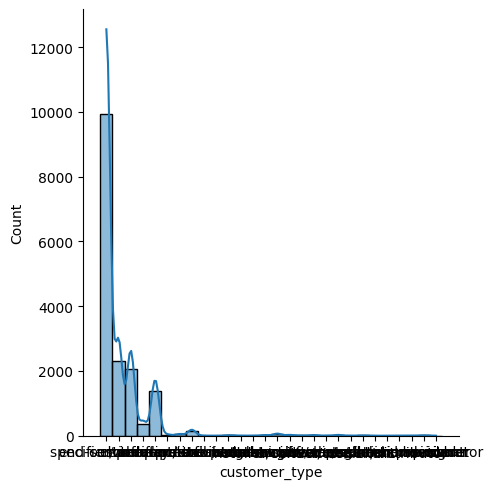

In [49]:
sns.displot(df['customer_type'], kde=True)

In [50]:
"""
# 비슷한 범주 통합
df['customer_type'] = df['customer_type'].str.replace('/', '').str.replace('-', '').str.lower().str.strip()
df['customer_type'] = df['customer_type'].replace({
    'specifier influencer': 'specifier/influencer',
    'solution ecopartner': 'solution eco-partner',
    'dealerdistributor': 'dealer/distributor',
    'software solution provider': 'software/solution provider',
    'homeowner': 'home owner',
    'installercontractor': 'installer/contractor',
    'manager director': 'manager/director',
    'architectconsultant': 'architect/consultant',
    'hvac engineer': 'hvac engineer',
    'interior designer': 'interior designer',
    'technical assistant': 'technical assistant',
    'administrator': 'administrator'
})
print(df['customer_type'].unique())
"""

"\n# 비슷한 범주 통합\ndf['customer_type'] = df['customer_type'].str.replace('/', '').str.replace('-', '').str.lower().str.strip()\ndf['customer_type'] = df['customer_type'].replace({\n    'specifier influencer': 'specifier/influencer',\n    'solution ecopartner': 'solution eco-partner',\n    'dealerdistributor': 'dealer/distributor',\n    'software solution provider': 'software/solution provider',\n    'homeowner': 'home owner',\n    'installercontractor': 'installer/contractor',\n    'manager director': 'manager/director',\n    'architectconsultant': 'architect/consultant',\n    'hvac engineer': 'hvac engineer',\n    'interior designer': 'interior designer',\n    'technical assistant': 'technical assistant',\n    'administrator': 'administrator'\n})\nprint(df['customer_type'].unique())\n"

In [51]:
# 결측치 처리
df['customer_type'].fillna('unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   bant_submit              59299 non-null  float64 
 1   customer_country         59299 non-null  category
 2   business_unit            59299 non-null  category
 3   com_reg_ver_win_rate     14568 non-null  float64 
 4   customer_idx             59299 non-null  category
 5   customer_type            59299 non-null  object  
 6   enterprise               59299 non-null  object  
 7   historical_existing_cnt  13756 non-null  float64 
 8   id_strategic_ver         3444 non-null   float64 
 9   it_strategic_ver         1121 non-null   float64 
 10  idit_strategic_ver       4565 non-null   float64 
 11  customer_job             40566 non-null  object  
 12  lead_desc_length         59299 non-null  int64   
 13  inquiry_type             58358 non-null  object  
 14  produc

In [52]:
# df['customer_type'] = df['customer_type'].astype('category')

In [53]:
"""
df_test['customer_type'] = df_test['customer_type'].str.replace('/', '').str.replace('-', '').str.lower().str.strip()
df_test['customer_type'] = df_test['customer_type'].replace({
    'specifier influencer': 'specifier/influencer',
    'solution ecopartner': 'solution eco-partner',
    'dealerdistributor': 'dealer/distributor',
    'software solution provider': 'software/solution provider',
    'homeowner': 'home owner',
    'installercontractor': 'installer/contractor',
    'manager director': 'manager/director',
    'architectconsultant': 'architect/consultant',
    'hvac engineer': 'hvac engineer',
    'interior designer': 'interior designer',
    'technical assistant': 'technical assistant',
    'administrator': 'administrator'
})
"""
df_test['customer_type'].fillna('unknown', inplace=True)
# df_test['customer_type'] = df_test['customer_type'].astype('category')

## enterprise

In [54]:
df['enterprise'] = df['enterprise'].astype('category')

In [55]:
# df_test['enterprise'] = df_test['enterprise'].astype('category')

## historical_existing_cnt

In [56]:
df['historical_existing_cnt'].fillna(0, inplace=True)

In [57]:
df['historical_existing_cnt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: historical_existing_cnt
Non-Null Count  Dtype  
--------------  -----  
59299 non-null  float64
dtypes: float64(1)
memory usage: 463.4 KB


In [58]:
df_n_information[3]

{'Variable': 'historical_existing_cnt',
 'Median': 4.0,
 'Mean': 19.91218377435301,
 'Q1': 1.0,
 'Q2': 4.0,
 'Q3': 19.0,
 'IQR': 18.0,
 'Lower Bound': -26.0,
 'Upper Bound': 46.0,
 'Outliers Count': 1676}

<Axes: ylabel='historical_existing_cnt'>

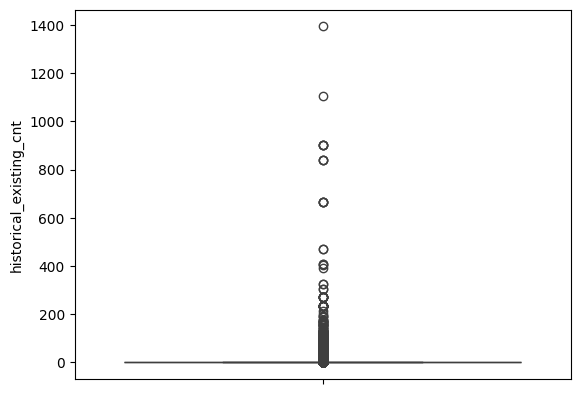

In [59]:
sns.boxplot(df['historical_existing_cnt'])

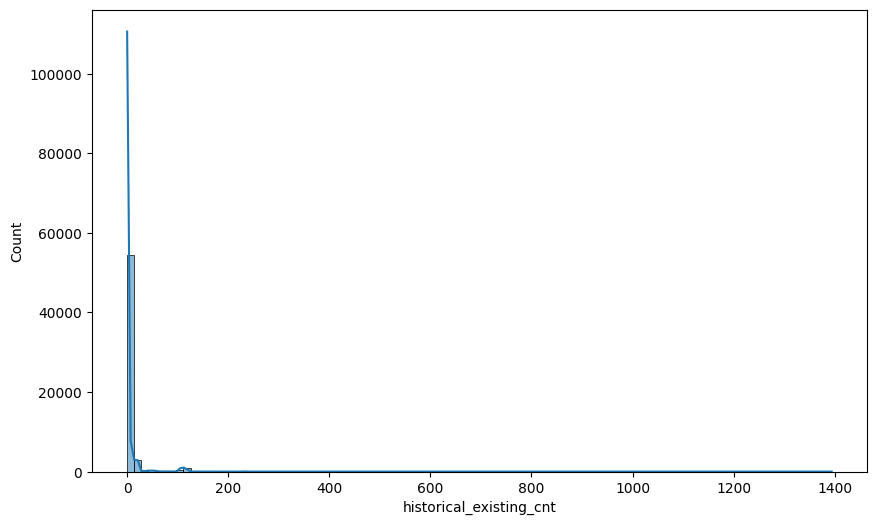

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['historical_existing_cnt'], bins=100, kde=True)
plt.show()

In [61]:
# 이상치 처리
upper_bound = 46
df['historical_existing_cnt'] = df['historical_existing_cnt'].apply(lambda x: min(x, upper_bound))

# 로그 변환
df['historical_existing_cnt_log'] = np.log1p(df['historical_existing_cnt'])

df[['historical_existing_cnt', 'historical_existing_cnt_log']].describe()
# 로그 변환 피처와 원본 피처 모두 유지

,historical_existing_cnt,historical_existing_cnt_log
count,59299.000000,59299.000000
mean,2.729844,0.425454
std,8.766214,0.977716
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,46.000000,3.850148


In [62]:
df_test['historical_existing_cnt'].fillna(0, inplace=True)
df_test['historical_existing_cnt'] = df_test['historical_existing_cnt'].apply(lambda x: min(x, upper_bound))
df_test['historical_existing_cnt_log'] = np.log1p(df_test['historical_existing_cnt'])

## customer_job

In [63]:
df['customer_job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: customer_job
Non-Null Count  Dtype 
--------------  ----- 
40566 non-null  object
dtypes: object(1)
memory usage: 463.4+ KB


In [64]:
print(df['customer_job'].nunique())

560


<Axes: xlabel='count', ylabel='customer_job'>

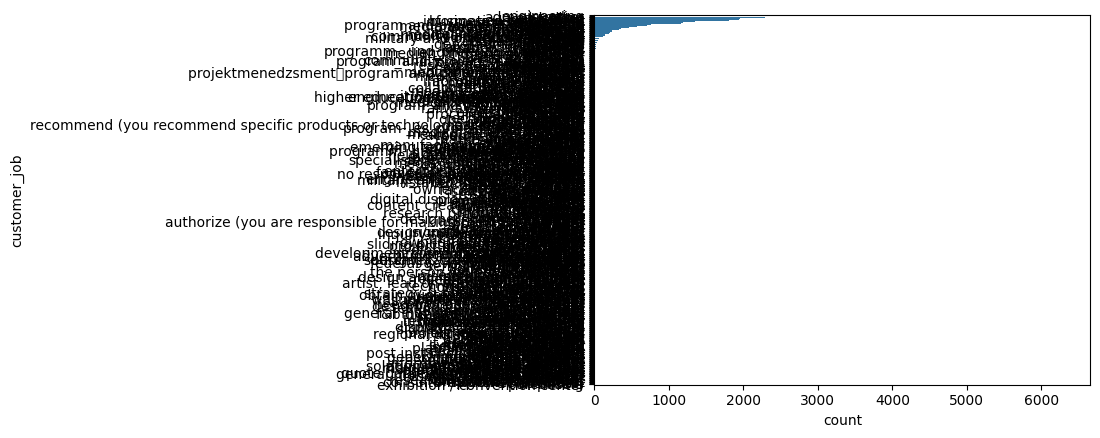

In [65]:
sns.countplot(y='customer_job', data=df, order=df['customer_job'].value_counts().index)

In [66]:
((df['customer_job'].value_counts()) <= 100).sum()

526

In [67]:
top_categories = df['customer_job'].value_counts().index[:15]
df['customer_job_reduced'] = df['customer_job'].apply(lambda x: x if x in top_categories else 'Other')

In [68]:
df['customer_job'].fillna('other', inplace=True)
df['customer_job'] = df['customer_job'].astype('category')
df['customer_job_reduced'] = df['customer_job_reduced'].astype('category')

In [69]:

top_categories_test = df_test['customer_job'].value_counts().index[:15]
df_test['customer_job_reduced'] = df_test['customer_job'].apply(lambda x: x if x in top_categories_test else 'Other')
df_test['customer_job'].fillna('other', inplace=True)
df_test['customer_job'] = df_test['customer_job'].astype('category')
df_test['customer_job_reduced'] = df_test['customer_job_reduced'].astype('category')


## lead_desc_length

In [70]:
df['lead_desc_length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: lead_desc_length
Non-Null Count  Dtype
--------------  -----
59299 non-null  int64
dtypes: int64(1)
memory usage: 463.4 KB


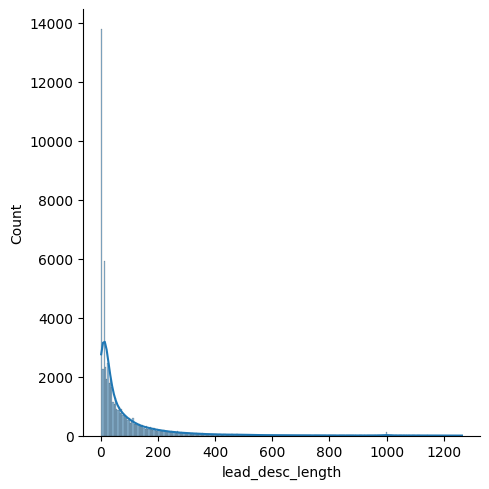

In [71]:
sns.displot(df['lead_desc_length'], kde=True)

In [72]:
# 로그변환, 스케일링
df['lead_desc_length'] = df['lead_desc_length'].apply(lambda x: np.log(x + 1))
scaler = MinMaxScaler()
df['lead_desc_length'] = scaler.fit_transform(df[['lead_desc_length']])

In [73]:
# df_test['lead_desc_length'] = df_test['lead_desc_length'].apply(lambda x: np.log(x + 1))
# df_test['lead_desc_length'] = scaler.fit_transform(df_test[['lead_desc_length']])

## inquiry_type

In [74]:
df['inquiry_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: inquiry_type
Non-Null Count  Dtype 
--------------  ----- 
58358 non-null  object
dtypes: object(1)
memory usage: 463.4+ KB


In [75]:
df['inquiry_type'].fillna('other', inplace=True)

<Axes: xlabel='count', ylabel='inquiry_type'>

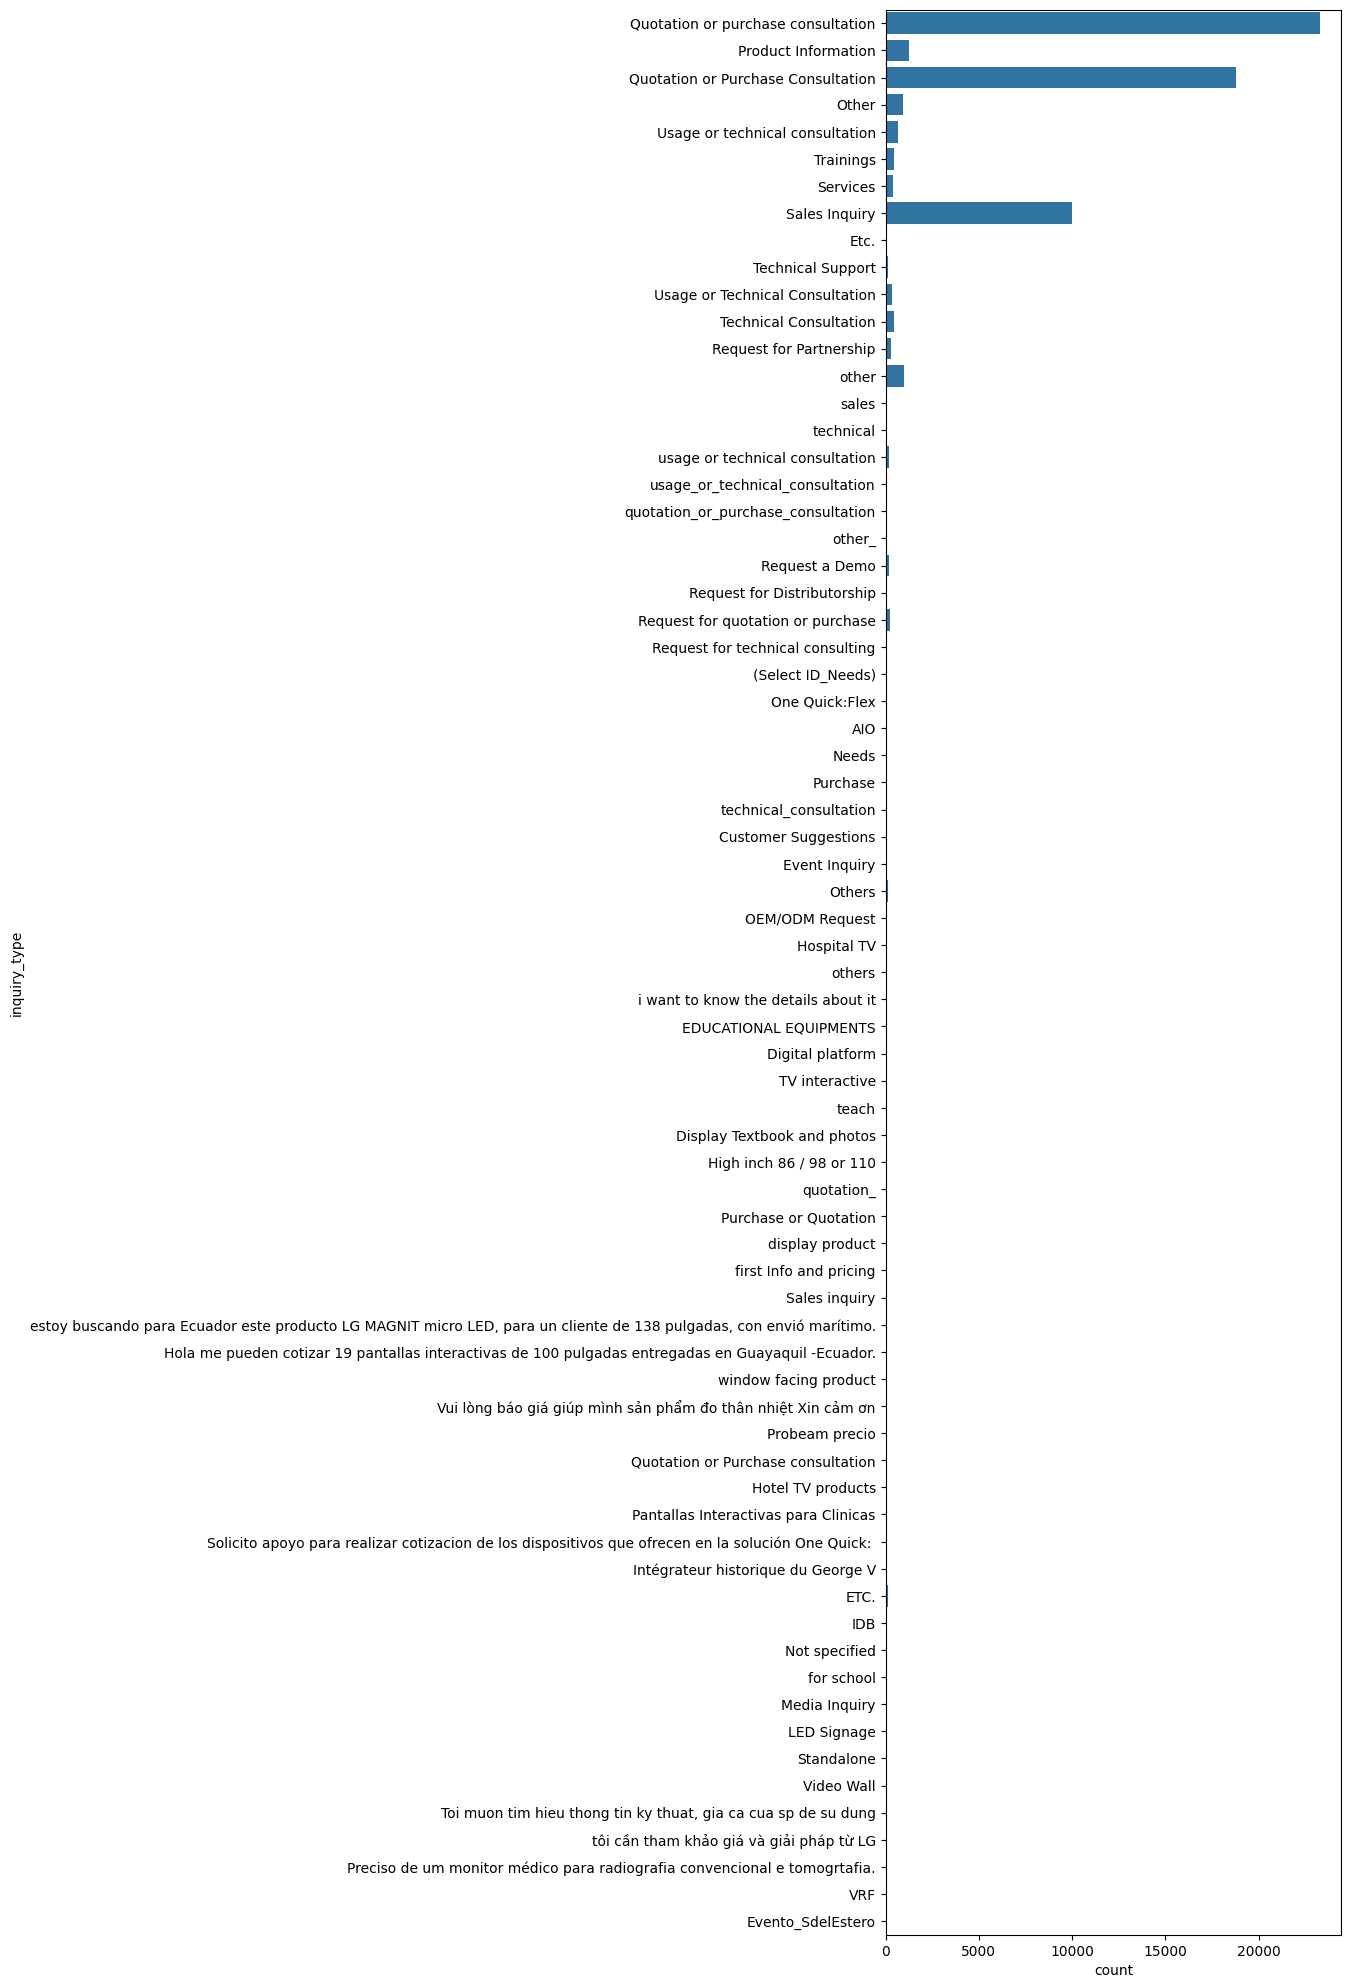

In [76]:
plt.figure(figsize=(20, 25))
plt.subplot(1, 3, 2)
sns.countplot(data = df, y = 'inquiry_type')

In [77]:
# 소문자
df['inquiry_type'] = df['inquiry_type'].str.lower()

# 빈도 적은 카테고리 'other'로 치환 (평균보다)
threshold = df['inquiry_type'].value_counts().mean()
value_counts = df['inquiry_type'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
df['inquiry_type'] = df['inquiry_type'].replace(to_replace, 'other')


In [78]:
df['inquiry_type'] = df['inquiry_type'].astype('category')

In [80]:

df_test['inquiry_type'].fillna('other', inplace=True)
df_test['inquiry_type'] = df_test['inquiry_type'].str.lower()
threshold = df_test['inquiry_type'].value_counts().mean()
value_counts = df_test['inquiry_type'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
df_test['inquiry_type'] = df_test['inquiry_type'].replace(to_replace, 'other')
# df_test['inquiry_type'] = df_test['inquiry_type'].astype('category')


## product_category

In [81]:
df['product_category'] = df['product_category'].astype('category')

## customer_position

In [83]:
df['customer_position'] = df['customer_position'].astype('category')

## response_corporate

In [85]:
df['response_corporate'] = df['response_corporate'].astype('category')

## business_area

In [87]:
df['business_area'].fillna('unknown', inplace=True)
df['business_area'] = df['business_area'].astype('category')

In [88]:
df_test['business_area'].fillna('unknown', inplace=True)

## lead_owner

In [89]:
df['lead_owner'] = df['lead_owner'].astype('category')

### 레이블 인코딩

In [91]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [92]:
# 레이블 인코딩할 칼럼들
label_columns = [
#    "customer_country",
#    "business_area",
#    "business_unit",
#    "customer_type",
#    "enterprise",
#    "customer_job",
#    "inquiry_type",
#    "product_category",
#    "customer_position",
#    "response_corporate",
    "expected_timeline"
]

df_all = pd.concat([df[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [93]:
for col in label_columns:  
    df[col] = df_all.iloc[: len(df)][col]
    df_test[col] = df_all.iloc[len(df) :][col]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   bant_submit                  59299 non-null  float64 
 1   customer_country             59299 non-null  category
 2   business_unit                59299 non-null  category
 3   com_reg_ver_win_rate         14568 non-null  float64 
 4   customer_idx                 59299 non-null  category
 5   customer_type                59299 non-null  object  
 6   enterprise                   59299 non-null  category
 7   historical_existing_cnt      59299 non-null  float64 
 8   id_strategic_ver             3444 non-null   float64 
 9   it_strategic_ver             1121 non-null   float64 
 10  idit_strategic_ver           4565 non-null   float64 
 11  customer_job                 59299 non-null  category
 12  lead_desc_length             59299 non-null  float64 
 13  i

### 2-2. 학습, 검증 데이터 분리

In [95]:
x_train, x_val, y_train, y_val = train_test_split(
    df.drop(["is_converted", "id_strategic_ver", "it_strategic_ver", "idit_strategic_ver", "ver_cus", "ver_pro"], axis=1),
    df["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

In [96]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47439 entries, 43573 to 53596
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   bant_submit                  47439 non-null  float64 
 1   customer_country             47439 non-null  category
 2   business_unit                47439 non-null  category
 3   com_reg_ver_win_rate         11616 non-null  float64 
 4   customer_idx                 47439 non-null  category
 5   customer_type                47439 non-null  object  
 6   enterprise                   47439 non-null  category
 7   historical_existing_cnt      47439 non-null  float64 
 8   customer_job                 47439 non-null  category
 9   lead_desc_length             47439 non-null  float64 
 10  inquiry_type                 47439 non-null  category
 11  product_category             47439 non-null  category
 12  customer_position            47439 non-null  category
 13  re

## 3. 모델 학습

### 가중치

In [97]:
df['idit_strategic_ver'].fillna(0, inplace=True)

df['ver_pro'] = df['ver_pro'].apply(lambda x: 1 if x == 1 else 0)
df['ver_cus'] = df['ver_cus'].apply(lambda x: 1 if x == 1 else 0)

sample_weight = df.loc[x_train.index, ['idit_strategic_ver', 'ver_pro', 'ver_cus']].sum(axis=1)
sample_weight

43573    0.0
25857    2.0
42264    0.0
7665     0.0
23088    0.0
        ... 
140      0.0
46009    0.0
2366     0.0
3535     0.0
53596    0.0
Length: 47439, dtype: float64

### 모델 정의 

In [98]:
# model = DecisionTreeClassifier()


# 캣부스트, 범주형 처리
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier, Pool
cat_features = ['customer_country', 'business_unit', 'customer_type',
                'enterprise', 'customer_job', 'inquiry_type',
                'product_category', 'customer_position', 'response_corporate',
                'business_area', 'lead_owner', 'customer_job_reduced',
               'customer_idx']
train_pool = Pool(x_train, y_train, cat_features=cat_features, weight = sample_weight)
"""
params = {
    'iterations' : 200,
    'learning_rate' : 0.6,
    'depth' : 8,
    'l2_leaf_reg' : 5,
    'eval_metric': 'Logloss',
    'random_seed': 42,
    'verbose': False
}
model = CatBoostClassifier(**params)
"""
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.5, loss_function='Logloss')

"""
from catboost import CatBoostClassifier
model = CatBoostClassifier()
"""
"""
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
"""

'\nfrom sklearn.ensemble import GradientBoostingClassifier\nmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)\n'

In [99]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47439 entries, 43573 to 53596
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   bant_submit                  47439 non-null  float64 
 1   customer_country             47439 non-null  category
 2   business_unit                47439 non-null  category
 3   com_reg_ver_win_rate         11616 non-null  float64 
 4   customer_idx                 47439 non-null  category
 5   customer_type                47439 non-null  object  
 6   enterprise                   47439 non-null  category
 7   historical_existing_cnt      47439 non-null  float64 
 8   customer_job                 47439 non-null  category
 9   lead_desc_length             47439 non-null  float64 
 10  inquiry_type                 47439 non-null  category
 11  product_category             47439 non-null  category
 12  customer_position            47439 non-null  category
 13  re

### 모델 학습

In [100]:
# model.fit(train_pool)
model.fit(train_pool, verbose=False)
# model.fit(x_train.fillna(0), y_train, sample_weight = sample_weight)
# model.fit(x_train.fillna(0), y_train, verbose=False, sample_weight = sample_weight)
# model.fit(x_train.fillna(0), y_train)

### 모델 성능 보기

In [101]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [102]:
pred = model.predict(x_val)
pred = [eval(x) for x in pred]
get_clf_eval(y_val, pred)

오차행렬:
 [[  589   358]
 [   95 10818]]

정확도: 0.9618
정밀도: 0.8611
재현율: 0.6220
F1: 0.7223


## 4. 제출하기

### 테스트 데이터 예측

In [103]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id", 
                       "id_strategic_ver", "it_strategic_ver", "idit_strategic_ver", 
                       "product_subcategory", "product_modelname", "customer_country.1", 
                       "business_subarea", "ver_cus", "ver_pro"], axis=1)

In [104]:
test_pred = model.predict(x_test)
# sum(test_pred) # True로 예측된 개수

test_pred_bool = [x == 'True' for x in test_pred]
sum(test_pred_bool)  # True로 예측된 개수

1035

### 제출 파일 작성

In [105]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**

## 피처 중요도 확인

In [106]:
drop_feature = []
for idx, feature, in enumerate(df.columns.drop(['is_converted', 'id_strategic_ver', 
                                               'it_strategic_ver', 'idit_strategic_ver',
                                               "ver_cus", "ver_pro"])):
    # 중요도 낮은 feature 찾기
    print('{} : {}'.format(feature,model.feature_importances_[idx]))
    if (model.feature_importances_[idx] <= 0.01) == True:
        drop_feature.append(feature)

bant_submit : 1.7315610001119586
customer_country : 3.458404591513011
business_unit : 1.2423267414052659
com_reg_ver_win_rate : 2.65422252904817
customer_idx : 9.50739024407438
customer_type : 14.871215977975098
enterprise : 3.738917095684987
historical_existing_cnt : 0.6697835826925741
customer_job : 2.3005483711196533
lead_desc_length : 10.788115421551563
inquiry_type : 1.9146249965021285
product_category : 5.449196353930953
customer_position : 5.91780998976882
response_corporate : 4.593934020138995
expected_timeline : 4.614770083104731
ver_win_rate_x : 0.5248541427536408
ver_win_ratio_per_bu : 0.5657503821667701
business_area : 1.505075401336265
lead_owner : 19.668996168654402
historical_existing_cnt_log : 1.5742149663111586
customer_job_reduced : 2.7082879401554525


In [107]:
drop_feature

[]

<Axes: ylabel='None'>

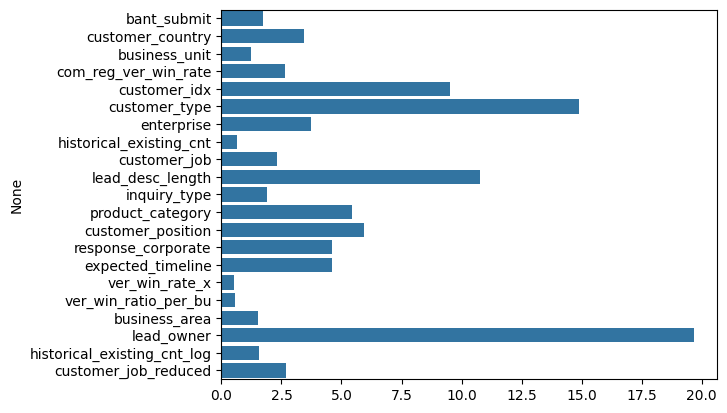

In [108]:
sns.barplot(x = model.feature_importances_, y = df.columns.drop(['is_converted', 'id_strategic_ver', 
                                               'it_strategic_ver', 'idit_strategic_ver', 'ver_cus', 'ver_pro']))